In [135]:
import logging
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import Callback
from keras.utils import to_categorical

In [136]:
# Function to compute and save statistics
def save_model_statistics(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 100 + "\n")
        f.write(f"{stage}:\n\n")
        for i in range(2):
            mean = np.mean(filters[:, :, 0, i])
            variance = np.var(filters[:, :, 0, i])
            f.write(f"Kernel {i + 1} Weights:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

            mean = np.mean(biases[i])
            variance = np.var(biases[i])
            f.write(f"Kernel {i + 1} Biases:\n")
            f.write(f"Mean: {mean}\n")
            f.write(f"Variance: {variance}\n")

# Function to save weights
def save_model_weights(file_path, filters, biases, stage):
    with open(file_path, 'a') as f:
        f.write("-" * 10 + "\n")
        f.write(f"\n{stage}:\n")
        for i in range(2):
            x = (filters[:, :, 0, i])
            y = (biases[i])
            f.write(f"Kernel {i + 1}\n")
            f.write(f"\n{x}\n")
            f.write(f"\n{y}\n")

# Function to save kernel comparison images
def save_kernel_comparison_images(file_path, filters_before, filters_after):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    for i in range(2):
        ax = axes[i]
        kernel = np.concatenate([filters_before[:, :, 0, i], filters_after[:, :, 0, i]], axis=1)
        ax.imshow(kernel, cmap='gray')
        #plt.set_title(f'Kernel {i + 1}')
        for (x, z), val in np.ndenumerate(kernel):
            ax.text(z, x, f'{val:.4f}', ha='center', va='center', color='red', fontsize=8)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(file_path)
    plt.close()


In [137]:
class WeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        weights = self.model.layers[0].get_weights()[0]
        bias = self.model.layers[0].get_weights()[1]
        print(f"\nEpoch {epoch + 1}:")
        print(f"Weights:\n{weights}")
        print(f"Bias:\n{bias}")
        print(f"Loss: {logs['loss']}")
        save_model_weights("6_weights.txt", weights, bias, epoch)


In [138]:
# Load MNIST data
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

x_full = x_full.reshape(-1, 28, 28, 1)
x_test_full = x_test_full.reshape(-1, 28, 28, 1)
y_full = to_categorical(y_full, num_classes=10)
y_test_full=to_categorical(y_test_full, num_classes=10)

In [139]:
print(x_full.shape)
print(x_full[0].shape)
print(y_full.shape)
print(y_full[0])

(60000, 28, 28, 1)
(28, 28, 1)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [140]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [141]:
weights_init=(model.layers[0].get_weights()[0])
bias_init=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_init.shape}")
print(f"Bias:\n{bias_init.shape}")
print(f"Weights:\n{weights_init}")
print(f"Bias:\n{bias_init}")


Weights:
(3, 3, 1, 2)
Bias:
(2,)
Weights:
[[[[-0.36858958 -0.14292231]]

  [[ 0.12592533 -0.4226858 ]]

  [[-0.38551733 -0.3370715 ]]]


 [[[-0.30056626 -0.29810524]]

  [[ 0.35903987  0.09952566]]

  [[-0.04231331 -0.35755306]]]


 [[[-0.04215842 -0.30991542]]

  [[-0.10605878  0.26562205]]

  [[-0.18122673  0.2530637 ]]]]
Bias:
[0. 0.]


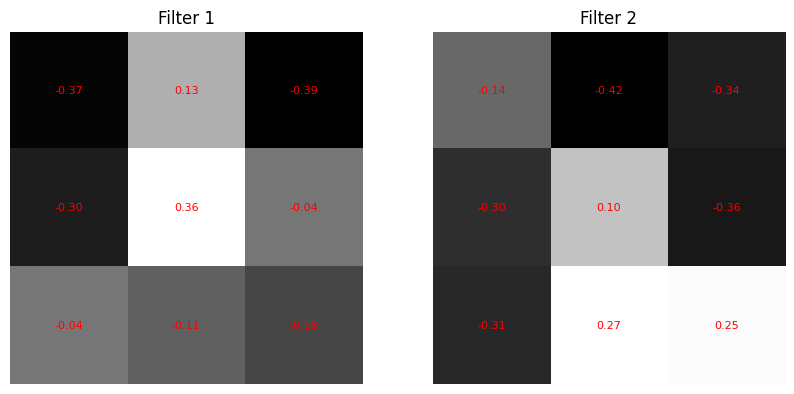

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

ax = axes[0]
ax.imshow(weights_init[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

ax = axes[1]
ax.imshow(weights_init[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_init[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [143]:
for i in range(2):
    mean = np.mean(weights_init[:, :, 0, i])
    variance = np.var(weights_init[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_init[i])
    variance = np.var(bias_init[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('6.txt', weights_init, bias_init, 'Before Training')
save_model_weights('6_weights.txt', weights_init, bias_init, 'Before Training')

Conv Layer 1 Weights:
Mean: -0.1046072393655777
Variance: 0.052084892988204956
Conv Layer 1 Biases:
Mean: 0.0
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: -0.13889354467391968
Variance: 0.06626051664352417
Conv Layer 2 Biases:
Mean: 0.0
Variance: 0.0
------------------------------


In [144]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_full, y_full, epochs=10, callbacks=[WeightsCallback()])

Epoch 1/10
1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.6750 - loss: 1.9735
Epoch 1:
Weights:
[[[[-0.41626552 -0.0339209 ]]

  [[-0.01123574 -0.20915963]]

  [[-0.4451945  -0.08020457]]]


 [[[-0.3327539  -0.23804627]]

  [[ 0.2125066   0.08596986]]

  [[-0.09437206 -0.20650136]]]


 [[[-0.05916286 -0.18011753]]

  [[-0.17877239  0.09161878]]

  [[-0.19995956  0.12409746]]]]
Bias:
[-0.12996191  0.23402052]
Loss: 0.9155928492546082
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.6774 - loss: 1.9511
Epoch 2/10
1852/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8806 - loss: 0.3983
Epoch 2:
Weights:
[[[[-0.43323034 -0.0596499 ]]

  [[ 0.02879489 -0.09614517]]

  [[-0.42454183 -0.0331276 ]]]


 [[[-0.32921603 -0.0644661 ]]

  [[ 0.20695488  0.0682204 ]]

  [[-0.05836762 -0.09174013]]]


 [[[-0.04944309 -0.05634461]]

  [[-0.18727916  0.01457585]]

  [[-0.14792638  0.0803935 ]]]]
Bias:
[-0.02288125  0.36073846]
Loss: 0.38452067971229553
1875/1875 ━━━━━━━━━━━━

In [145]:
weights_final=(model.layers[0].get_weights()[0])
bias_final=(model.layers[0].get_weights()[1])
print(f"Weights:\n{weights_final}")
print(f"Bias:\n{bias_final}")

Weights:
[[[[-0.09565131 -0.05644754]]

  [[ 0.00526409 -0.06561507]]

  [[-0.15057871 -0.03706778]]]


 [[[-0.03210143 -0.04503354]]

  [[ 0.01741816  0.0578945 ]]

  [[-0.03655    -0.03483896]]]


 [[[ 0.05165758 -0.02748503]]

  [[-0.02825598 -0.00440403]]

  [[-0.01918657  0.03494626]]]]
Bias:
[-0.00076523  0.5320542 ]


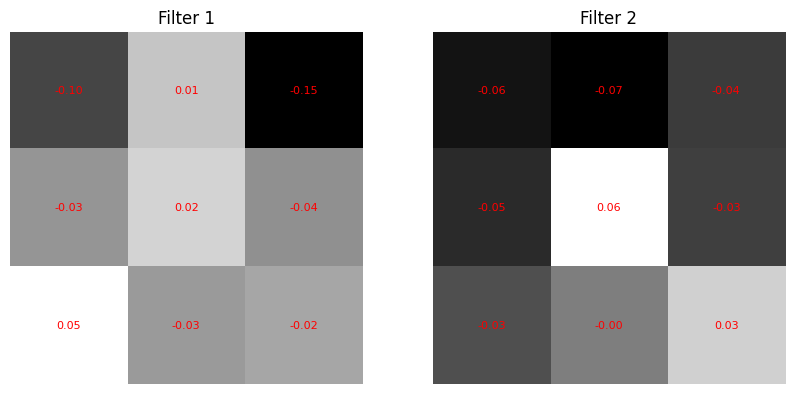

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.imshow(weights_final[:, :, 0, 0], cmap='gray')
ax.set_title('Filter 1')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 0]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
ax = axes[1]
ax.imshow(weights_final[:, :, 0, 1], cmap='gray')
ax.set_title('Filter 2')
ax.axis('off')
for (i, j), val in np.ndenumerate(weights_final[:, :, 0, 1]):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)
plt.show()

In [147]:
for i in range(2):
    mean = np.mean(weights_final[:, :, 0, i])
    variance = np.var(weights_final[:, :, 0, i])
    print(f"Conv Layer {i + 1} Weights:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    
    mean = np.mean(bias_final[i])
    variance = np.var(bias_final[i])
    print(f"Conv Layer {i + 1} Biases:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print("-" * 30)

save_model_statistics('6.txt', weights_final, bias_final, 'After Training')
save_model_weights('6_weights.txt', weights_final, bias_final, 'After Training')
save_kernel_comparison_images('6.png', weights_init, weights_final)

Conv Layer 1 Weights:
Mean: -0.03199823945760727
Variance: 0.0032378521282225847
Conv Layer 1 Biases:
Mean: -0.0007652330095879734
Variance: 0.0
------------------------------
Conv Layer 2 Weights:
Mean: -0.019783463329076767
Variance: 0.0015480911824852228
Conv Layer 2 Biases:
Mean: 0.5320541858673096
Variance: 0.0
------------------------------


In [148]:
test_loss, test_acc = model.evaluate(x_test_full, y_test_full)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9384 - loss: 0.2293
Test accuracy: 0.9474999904632568


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step


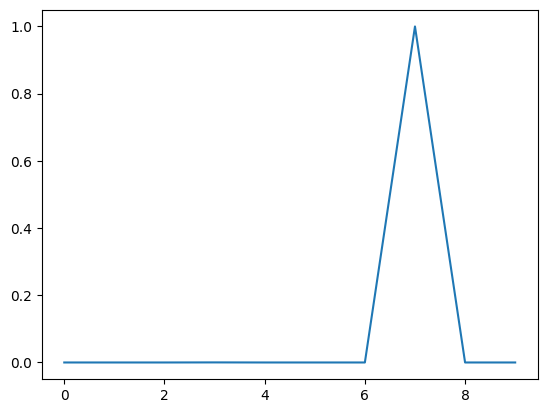

In [149]:
predictions = model.predict(x_test_full)
plt.plot((predictions[0])) 


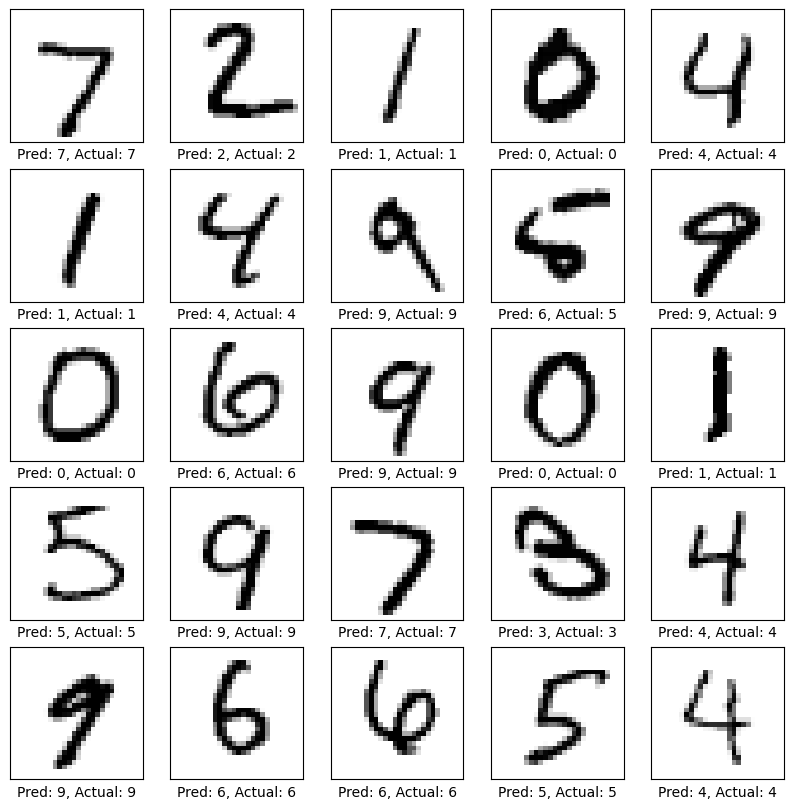

In [150]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_full[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test_full[i])}")
plt.show()


In [151]:

from scipy.signal import convolve2d

image = x_test_full[1]
image = image[:, :, 0]

kernel = weights_final[:,:,0,1]

print(kernel)
print(image.shape)

[[-0.05644754 -0.06561507 -0.03706778]
 [-0.04503354  0.0578945  -0.03483896]
 [-0.02748503 -0.00440403  0.03494626]]
(28, 28)


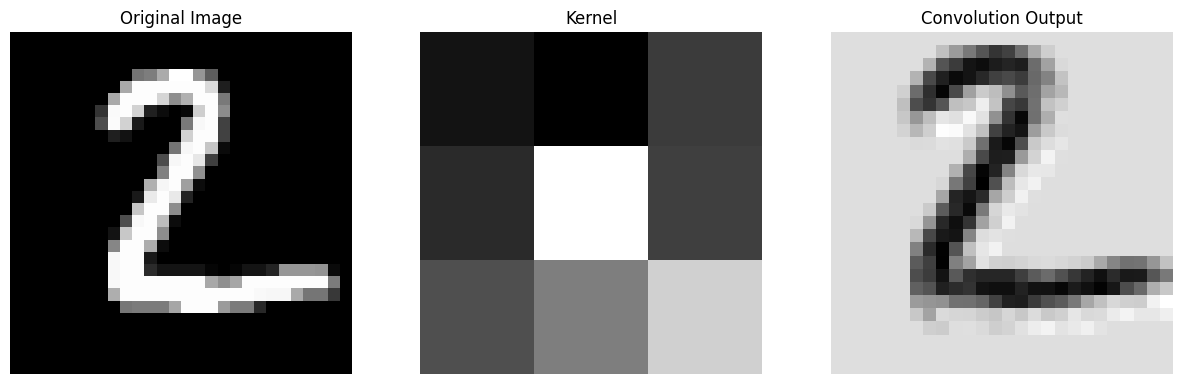

In [152]:


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()


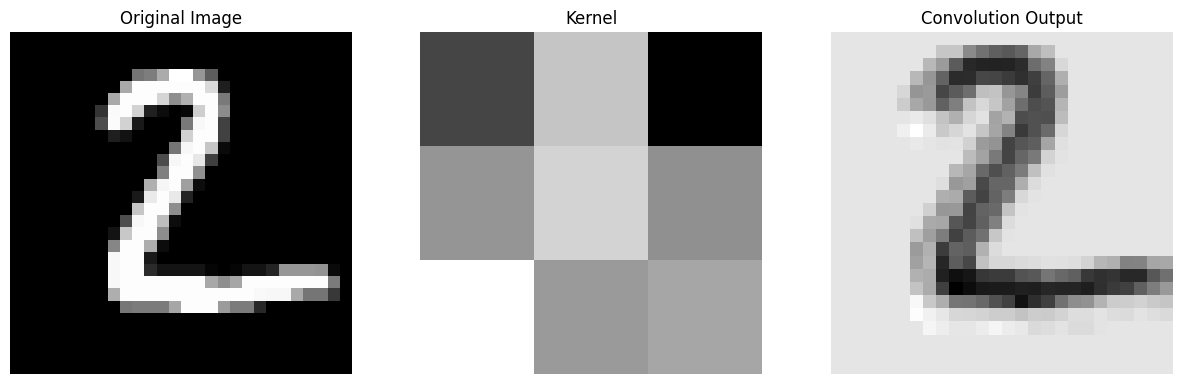

In [153]:
kernel = weights_final[:,:,0,0]


# Perform the convolution operation with no padding and stride of 1
convolved_output = convolve2d(image, kernel, mode='valid')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Kernel
axs[1].imshow(kernel, cmap='gray')
axs[1].set_title('Kernel')
axs[1].axis('off')

# Convolution output
axs[2].imshow(convolved_output, cmap='gray')
axs[2].set_title('Convolution Output')
axs[2].axis('off')

plt.show()
